In [2]:
from fredapi import Fred
import pandas as pd

In [3]:
API_KEY = 'b45ebae3eee229f0b4904f5c9ffdefe3'
fred = Fred(api_key=API_KEY)

In [4]:
start_date = "2023-01-01"
end_date = "2023-12-31"
treasury_yields = pd.DataFrame({"one_month_treasury":fred.get_series("DGS1MO",start_date,end_date),
                                "three_month_treasury":fred.get_series("DGS3MO",start_date,end_date),
                                "six_month_treasury":fred.get_series("DGS6MO",start_date,end_date),
                                "one_year_treasury":fred.get_series("DGS1",start_date,end_date),
                                "two_year_treasury":fred.get_series("DGS2",start_date,end_date),
                                "three_year_treasury":fred.get_series("DGS3",start_date,end_date),
                                "five_year_treasury":fred.get_series("DGS5",start_date,end_date),
                                "seven_year_treasury":fred.get_series("DGS7",start_date,end_date),
                                "ten_year_treasury":fred.get_series("DGS10",start_date,end_date),
                                "twenty_year_treasury":fred.get_series("DGS20",start_date,end_date),
                                "thirty_year_treasury":fred.get_series("DGS30",start_date,end_date)})
treasury_yields.head()

,one_month_treasury,three_month_treasury,six_month_treasury,one_year_treasury,two_year_treasury,three_year_treasury,five_year_treasury,seven_year_treasury,ten_year_treasury,twenty_year_treasury,thirty_year_treasury
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,4.17,4.53,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
2023-01-04,4.20,4.55,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2023-01-05,4.30,4.66,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
2023-01-06,4.32,4.67,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67


In [5]:
treasury_yields.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=260, freq=None)

In [6]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\tommy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
bond_yields = pd.read_excel("bonds_yields.xlsx")
bond_yields.head()

,Bond ID,WAL (years),Yield (%),Sector
0,Bond A,1.0,8.63,Telecommunication
1,Bond B,1.5,7.95,Consumer Staples
2,Bond C,2.2,7.53,Utilities
3,Bond D,3.0,7.71,Financials
4,Bond E,4.0,8.45,Telecommunication


In [8]:
bond_yields = bond_yields.rename(columns = {"Bond ID":"bond_id","WAL (years)":"wal", "Yield (%)":"yield"})

In [9]:
from collections import defaultdict

In [10]:
maturity_mean = dict()
list_maturity = list(treasury_yields.columns)
n_maturity = [0.083,0.25,0.5,1,2,3,5,7,10,20,30]
list_mean = []
for i in list_maturity:
    list_mean.append(treasury_yields[i].mean())
for i in range(len(list_mean)):
    maturity_mean[n_maturity[i]] = list_mean[i]
print(maturity_mean)

{0.083: 5.13984, 0.25: 5.278839999999999, 0.5: 5.283639999999999, 1: 5.081720000000001, 2: 4.582959999999999, 3: 4.300800000000001, 5: 4.05812, 7: 4.025480000000001, 10: 3.959, 20: 4.25716, 30: 4.0948}


In [11]:
bond_yields["spread"] = bond_yields.apply(
    lambda row: row["yield"] - maturity_mean[row["wal"]]
    if row["wal"] in maturity_mean else None,
    axis=1
)
print(bond_yields)

   bond_id  wal  yield             Sector   spread
0   Bond A  1.0   8.63  Telecommunication  3.54828
1   Bond B  1.5   7.95   Consumer Staples      NaN
2   Bond C  2.2   7.53          Utilities      NaN
3   Bond D  3.0   7.71         Financials  3.40920
4   Bond E  4.0   8.45  Telecommunication      NaN
5   Bond F  5.0   7.74   Consumer Staples  3.68188
6   Bond G  6.2   7.66          Utilities      NaN
7   Bond H  8.0   8.03         Financials      NaN
8   Bond I  9.0   8.33  Telecommunication      NaN
9   Bond J  4.5   7.38   Consumer Staples      NaN
10  Bond K  1.3   8.55  Telecommunication      NaN
11  Bond L  2.0   7.73   Consumer Staples  3.14704
12  Bond M  2.8   7.61          Utilities      NaN
13  Bond N  3.5   7.75         Financials      NaN
14  Bond O  5.3   8.64  Telecommunication      NaN
15  Bond P  6.0   7.56   Consumer Staples      NaN
16  Bond Q  7.5   7.83          Utilities      NaN
17  Bond R  8.5   8.23         Financials      NaN
18  Bond S  5.2   8.34  Telecom

In [12]:
import numpy as np
# y - y1 = (y2-y1)/(x2-x1)*(x-x1), y between y1, y2
for i in range(len(bond_yields)):
    if np.isnan((bond_yields.iloc[i]["spread"])):
        x = bond_yields.iloc[i]["wal"]
        x1, x2 = (0,0)
        for j in maturity_mean.keys():
            if x1 != 0 and x2 != 0:
                y = maturity_mean[x1] + (maturity_mean[x2]-maturity_mean[x1])/(x2-x1) * (x-x1)
                bond_yields.loc[i,"spread"] = y
                continue
            if j < x:
                x1 = j
            if j > x:
                x2 = j
print(bond_yields)
            

   bond_id  wal  yield             Sector    spread
0   Bond A  1.0   8.63  Telecommunication  3.548280
1   Bond B  1.5   7.95   Consumer Staples  4.832340
2   Bond C  2.2   7.53          Utilities  4.526528
3   Bond D  3.0   7.71         Financials  3.409200
4   Bond E  4.0   8.45  Telecommunication  4.179460
5   Bond F  5.0   7.74   Consumer Staples  3.681880
6   Bond G  6.2   7.66          Utilities  4.038536
7   Bond H  8.0   8.03         Financials  4.003320
8   Bond I  9.0   8.33  Telecommunication  3.981160
9   Bond J  4.5   7.38   Consumer Staples  4.118790
10  Bond K  1.3   8.55  Telecommunication  4.932092
11  Bond L  2.0   7.73   Consumer Staples  3.147040
12  Bond M  2.8   7.61          Utilities  4.357232
13  Bond N  3.5   7.75         Financials  4.240130
14  Bond O  5.3   8.64  Telecommunication  4.053224
15  Bond P  6.0   7.56   Consumer Staples  4.041800
16  Bond Q  7.5   7.83          Utilities  4.014400
17  Bond R  8.5   8.23         Financials  3.992240
18  Bond S  

Text(0, 0.5, 'Credit Spread')

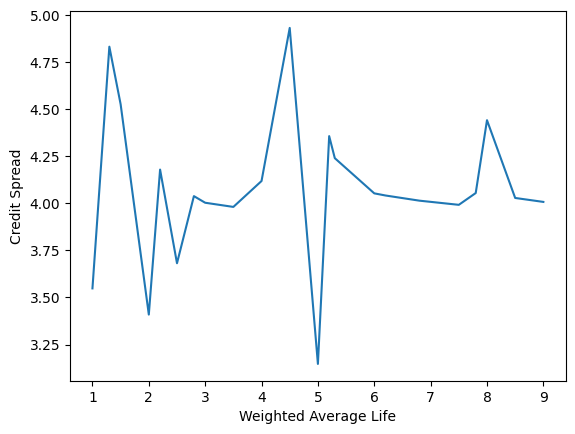

In [13]:
from matplotlib import pyplot as plt
WALlist = sorted(list(bond_yields["wal"]))
spreadlist = (list(bond_yields["spread"]))
plt.plot(WALlist,spreadlist)
plt.xlabel("Weighted Average Life")
plt.ylabel("Credit Spread")

As we can see, here, the spread of bonds with different weighted average life does not display a clear pattern and has a lot of outliers, which makes sense since we're matching the corresponding treasury yield with the bond's WAL, and while bonds with higher weighted average life tends to have a higher yield, so does the treasury bonds with higher yields. This, combining with the fact that we have a very small sample size, makes it hard to capture strong pattern from a line graph like this. So, we can try something else.

In [14]:
import sqlite3
conn = sqlite3.connect("bonds.db")
cursor = conn.cursor()
cursor.execute('''CREATE TABLE bond_yields (
               bond_id TEXT PRIMARY KEY,
               wal FLOAT,
               yield FLOAT,
               Sector TEXT,
               spread FLOAT
               )''')
conn.commit()

OperationalError: table bond_yields already exists

In [ ]:
bond_yields.to_sql("bond_yields",con=conn,if_exists="replace",index=False)

22

In [ ]:
print(pd.read_sql("SELECT * FROM bond_yields",conn))

   bond_id  wal  yield             Sector    spread
0   Bond A  1.0   8.63  Telecommunication  3.548280
1   Bond B  1.5   7.95   Consumer Staples  4.832340
2   Bond C  2.2   7.53          Utilities  4.526528
3   Bond D  3.0   7.71         Financials  3.409200
4   Bond E  4.0   8.45  Telecommunication  4.179460
5   Bond F  5.0   7.74   Consumer Staples  3.681880
6   Bond G  6.2   7.66          Utilities  4.038536
7   Bond H  8.0   8.03         Financials  4.003320
8   Bond I  9.0   8.33  Telecommunication  3.981160
9   Bond J  4.5   7.38   Consumer Staples  4.118790
10  Bond K  1.3   8.55  Telecommunication  4.932092
11  Bond L  2.0   7.73   Consumer Staples  3.147040
12  Bond M  2.8   7.61          Utilities  4.357232
13  Bond N  3.5   7.75         Financials  4.240130
14  Bond O  5.3   8.64  Telecommunication  4.053224
15  Bond P  6.0   7.56   Consumer Staples  4.041800
16  Bond Q  7.5   7.83          Utilities  4.014400
17  Bond R  8.5   8.23         Financials  3.992240
18  Bond S  

In [ ]:
by_sector = pd.read_sql("SELECT Sector, AVG(spread) AS average_spread FROM bond_yields GROUP BY Sector",conn)
by_sector

,Sector,average_spread
0,Consumer Staples,4.043955
1,Financials,3.930528
2,Telecommunication,4.124845
3,Utilities,4.193088


Text(0.5, 1.0, 'Average Spread By Sector')

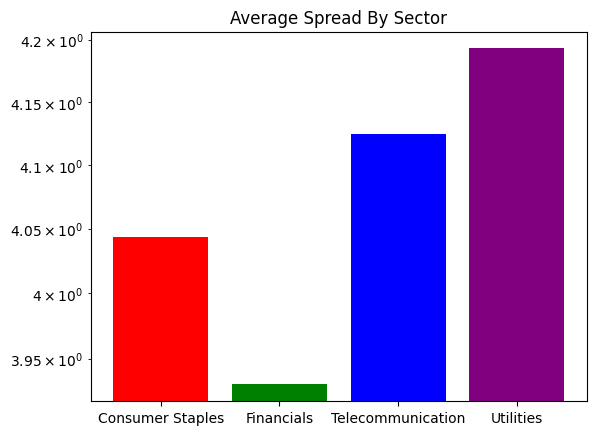

In [ ]:
plt.bar(list(by_sector["Sector"]),list(by_sector["average_spread"]),color = ["red","green","blue","purple"])
plt.yscale("log")
plt.title("Average Spread By Sector")

As we can see, on average these sectors' performances are pretty close due to the fair pricing of the market, but utilities perform the best and financials performs the worth. That's a diffference of over 0.2, which is not a lot, but not negligible either. 

However, is this really the case? After all, we have a small sample size, and we might want to consider the effect of WAL in these spreads, as some sections that perform well could simply be having a higher WAL. Sure, as mentioned previously, we matched the bonds yields with the corresponding treasury yields, but credit risk increases much slower in treasury bonds compared to corporate bonds as their maturity grows, so we would still expect a higher spread in high WAL corporate bonds.

In [15]:
wal_by_sector = (pd.read_sql("SELECT Sector, AVG(wal) AS average_wal FROM bond_yields GROUP BY Sector",conn))
print(wal_by_sector)

              Sector  average_wal
0   Consumer Staples     3.583333
1         Financials     6.160000
2  Telecommunication     4.300000
3          Utilities     5.100000


Text(0.5, 1.0, 'Average WAL By Sector')

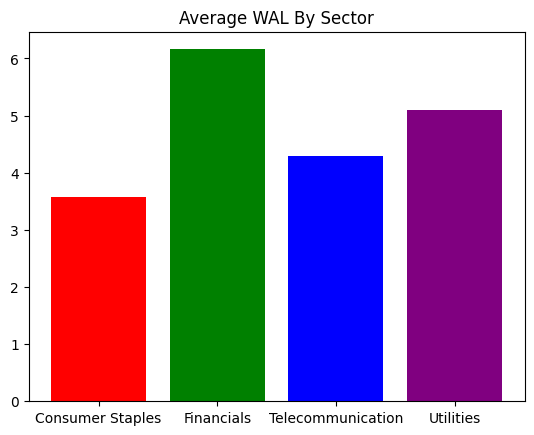

In [ ]:
plt.bar(list(wal_by_sector["Sector"]),list(wal_by_sector["average_wal"]),color = ["red","green","blue","purple"])
plt.title("Average WAL By Sector")

As we can see, the pattern of average WAL and average spread actually matches for Consumer Staples, Telecommunication, and Utilities. This means that the only valuable information we could get from the previous graphs is that Financials don't perform well (high WAL, low spread). To get a reasonable result, we need to punish higher WAL with certain risk aversion parameters that takes into account of the investor's utilities. Since we don't have too much time or data to tune the hyperparameter here, I will just set it as 0.2 so the punishment is visible but not too strong.

In [121]:
weighted_sectors = pd.read_sql('''WITH adjusted_sectors AS (SELECT Sector, spread - 0.2*wal AS adjusted_spread FROM bond_yields GROUP BY Sector) 
                               SELECT Sector, AVG(adjusted_spread) AS mean_adjusted_spread FROM adjusted_sectors GROUP BY Sector''',conn)
weighted_sectors

,Sector,mean_adjusted_spread
0,Consumer Staples,4.532340
1,Financials,2.809200
2,Telecommunication,3.348280
3,Utilities,4.086528


Text(0.5, 1.0, 'Average Adjusted Spread by Sector')

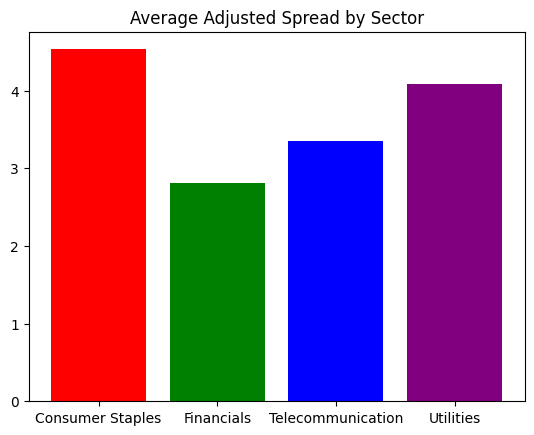

In [122]:
plt.bar(list(weighted_sectors["Sector"]),list(weighted_sectors["mean_adjusted_spread"]),color = ["red","green","blue","purple"])
plt.title("Average Adjusted Spread by Sector")

Here, we can see that Consumer Staples actually performs the best, having the WAL and credit risk taken into account. So it seems like we have, in ranking of value,
Consumer Staples > Utilities > Telecommunication > Financials.